In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime, timedelta, date
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import warnings
import math as ma
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")



from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
# load the dataset
data = pd.read_csv('model_df.csv')
data

,Unnamed: 0,customer_id,first_name,last_name,gender,3y_bike_purchases,DOB,job_title,job_industry_category,wealth_segment,...,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,AgeGroup,high_margin
0,0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,...,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,50-70,False
1,1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,...,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,50-70,False
2,2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,...,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,50-70,False
3,3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,...,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,50-70,False
4,4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,...,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,50-70,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,19992,3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,...,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0,50-70,False
19993,19993,3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,...,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0,50-70,True
19994,19994,3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,...,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,33888.0,50-70,False
19995,19995,3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,...,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0,50-70,False


In [3]:

# drop columns with missing values
data = data.dropna(axis=1, how='any')


In [4]:

# extract the numerical data into a new dataframe
data_num = data.select_dtypes(include=['number'])
data_test = data_num.join(data['high_margin'])


In [5]:

# extract the numerical data into a new dataframe
data_num = data.select_dtypes(include=['number'])
data_test = data_num.join(data['high_margin'])


In [6]:
data_test = data_test.drop(['Unnamed: 0', 'customer_id','transaction_id'], axis=1)

In [7]:
data_test

,3y_bike_purchases,Age,product_id,list_price,high_margin
0,93,69.0,86,235.63,False
1,93,69.0,38,1577.53,False
2,93,69.0,47,1720.70,False
3,93,69.0,72,360.40,False
4,93,69.0,2,71.49,False
...,...,...,...,...,...
19992,71,55.0,69,792.90,False
19993,71,55.0,74,1228.07,True
19994,71,55.0,33,1311.44,False
19995,71,55.0,22,60.34,False


In [8]:
# split the data into features and target variable
X = data_test.drop('high_margin', axis=1)
y = data_test['high_margin']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [9]:
# initialize the model
model = LogisticRegression()

# fit the model on the training set
model.fit(X_train, y_train)

# predict the target variable on the testing set
y_pred = model.predict(X_test)

# evaluate the performance of the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)

print('The accuracy of the model is:', accuracy)

The accuracy of the model is: 0.70275


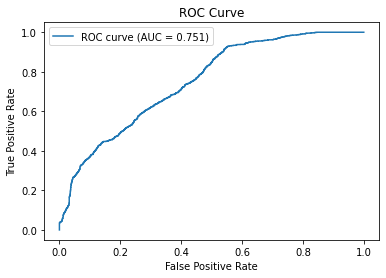

In [10]:

from sklearn.metrics import roc_curve, auc

# Generate predicted probabilities for each sample in the test set
predicted_probs = model.predict_proba(X_test)

# Compute the true positive rate and false positive rate for a range of probability thresholds
fpr, tpr, thresholds = roc_curve(y_test, predicted_probs[:,1])

# Compute the AUC score
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.3f)' % auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


In [11]:
# select 1000 random rows from the dataset
data_subset  = data_test.sample(1000)


# split the data into features and target variable
X = data_subset.drop('high_margin', axis=1)
y = data_subset['high_margin']

# predict the target variable using the trained model
y_pred = model.predict(X)

# create a new dataframe with the original data and the predicted values
results = pd.DataFrame({'original': y, 'predicted': y_pred})

# display the results
print(results)



       original  predicted
16260     False      False
3304       True       True
7821       True       True
2611      False      False
1056       True      False
...         ...        ...
2092      False       True
19154      True      False
19824     False      False
3248      False      False
10352     False      False

[1000 rows x 2 columns]


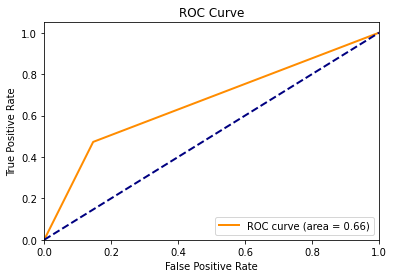

In [12]:

from sklearn.metrics import roc_curve, auc

# calculate the true positive rate and false positive rate
fpr, tpr, thresholds = roc_curve(results['original'], results['predicted'])

# calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")



In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          19997 non-null  int64  
 1   customer_id         19997 non-null  int64  
 2   first_name          19997 non-null  object 
 3   gender              19997 non-null  object 
 4   3y_bike_purchases   19997 non-null  int64  
 5   wealth_segment      19997 non-null  object 
 6   deceased_indicator  19997 non-null  object 
 7   owns_car            19997 non-null  object 
 8   Age                 19997 non-null  float64
 9   transaction_id      19997 non-null  int64  
 10  product_id          19997 non-null  int64  
 11  transaction_date    19997 non-null  object 
 12  online_order        19997 non-null  bool   
 13  order_status        19997 non-null  object 
 14  list_price          19997 non-null  float64
 15  AgeGroup            19997 non-null  object 
 16  high